# <center>Educational Mini-Project1</center>

<hr>

**Contributions**:
We used our cleaned up data and insights from the first project, which allowed for minimal hands on work in creating this mini-project.
During class, Danny coded while Vo and Joey assited in piecing togther code snippets and ideas so that we could execute the models.
Vo added Support Vector Continued, kde plots to the support Vector section along with explantion of the kde plots. Joey completed the Modeling write ups and support vector scatter plots, while Danny cleaned up code and added vector insights, as well as notebook aesthetics


### Table of Contents
<a class = "anchor" id = "toc"></a>
* **[Understanding Data](#understanding)**
* **[Data Transformation](#data)**
* **[Modeling](#modeling)**
    * [Logistic Regression](#logistic)
    * [Support Vector Machines](#svm)
* **[Model Evaulation](#eval)**
* **[Interpretation](#interp)**
* **[Support Vector Evaulation](#support)**

### Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("cleandf.csv")
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,MathResult,ReadingResult,WritingResult
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,Pass,Pass,Pass
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,Fail,Pass,Pass
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,Fail,Fail,Fail
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,Pass,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,Fail,Fail,Fail
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,Fail,Fail,Fail
30638,female,group C,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,Fail,Pass,Fail
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,Pass,Pass,Pass


### Understanding Data
<a class ='anchor' id = understanding></a>
[Back to Table of Contents](#toc)

Making a count plot of the response variable before running Support Vector Machines (SVM) and Logistic Regression can provide valuable insights and help in understanding the data. Here are a few reasons why it can be beneficial:

- **Class Imbalance Detection:** A count plot allows us to visualize the distribution of different classes in the response variable. It helps identify if there is a significant class imbalance, meaning that one class is disproportionately represented compared to others.<br><br>

- **Data Understanding:** Count plots provide a quick overview of the frequency or count of each class in the response variable. This understanding can help in determining the overall nature of the dataset.<br><br>

- **Decision Boundary Assessment:** SVM and Logistic Regression models are influenced by the decision boundaries they learn from the data. Imbalanced classes can result in skewed decision boundaries, where the minority class might be underrepresented.<br><br>

- **Performance Evaluation:** In classification tasks, accuracy alone may not be an adequate performance metric, especially when dealing with imbalanced datasets. Count plots allow us to identify the prevalence of different classes, enabling us to choose appropriate evaluation metrics like precision, recall, F1 score, or area under the Receiver Operating Characteristic curve (AUC-ROC).

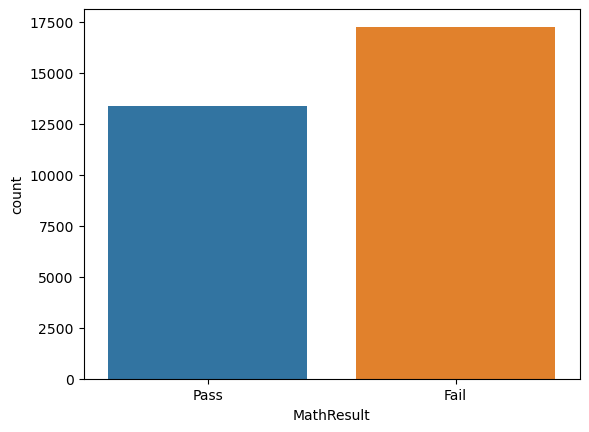

In [3]:
sns.countplot(x= "MathResult",data=df);

### Cleaning Dataset - Transforming Binary Categorical Variables
<a class ='anchor' id = data></a>
[Back to Table of Contents](#toc)

Transforming binary categorical variables into a dummy or one-hot encoded version before running Support Vector Machines (SVM) and Logistic Regression can be beneficial for several reasons:

- **Numerical Representation:** SVM and Logistic Regression are numerical algorithms that work with numeric inputs. By converting binary categorical variables into dummy variables, we represent them as numeric values (0 or 1) that can be directly used by these models.<br><br>

- **Avoiding Ordinal Assumptions:** When using binary categorical variables as numeric inputs, some models might assume a particular ordinal relationship between the categories. However, in many cases, such an assumption is not appropriate or desired. Dummy encoding eliminates any implicit ordinal assumptions by representing each category as a separate binary variable. This way, each category is treated independently, allowing the models to capture the potential non-linear relationships between the categories and the response variable.<br><br>

- **Handling Non-Linearity:** SVM and Logistic Regression models are capable of capturing non-linear relationships between the input variables and the response variable. Dummy encoding allows for the representation of non-linear relationships between binary categorical variables and the response variable. 

In [4]:
df_dummy = pd.get_dummies(df, columns=['Gender', 'LunchType', 'TestPrep', 'IsFirstChild','TransportMeans'],
                          drop_first=True)
df_dummy.head()

,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,MathResult,ReadingResult,WritingResult,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus
0,group C,bachelor's degree,married,regularly,3.0,< 5,71,71,74,Pass,Pass,Pass,0,1,1,1,1
1,group C,some college,married,sometimes,0.0,5 - 10,69,90,88,Fail,Pass,Pass,0,1,1,1,1
2,group B,master's degree,single,sometimes,4.0,< 5,87,93,91,Pass,Pass,Pass,0,1,1,1,1
3,group A,associate's degree,married,never,1.0,5 - 10,45,56,42,Fail,Fail,Fail,1,0,1,0,1
4,group C,some college,married,sometimes,0.0,5 - 10,76,78,75,Pass,Pass,Pass,1,1,1,1,1


In [5]:
df_dummy["WklyStudyHours"] = [1 if x == '> 10' else 0 for x in df_dummy["WklyStudyHours"]]
df_dummy.WklyStudyHours.unique()

array([0, 1], dtype=int64)

In [6]:
df_dummy["PracticeSport"] = [0 if x == 'never' else 1 for x in df_dummy["PracticeSport"]]
df_dummy.PracticeSport.unique()

array([1, 0], dtype=int64)

In [7]:
math_df = df_dummy.drop(["ReadingResult", "WritingResult", "MathScore"], axis = 1)
math_df

,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,ReadingScore,WritingScore,MathResult,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus
0,group C,bachelor's degree,married,1,3.0,0,71,74,Pass,0,1,1,1,1
1,group C,some college,married,1,0.0,0,90,88,Fail,0,1,1,1,1
2,group B,master's degree,single,1,4.0,0,93,91,Pass,0,1,1,1,1
3,group A,associate's degree,married,0,1.0,0,56,42,Fail,1,0,1,0,1
4,group C,some college,married,1,0.0,0,78,75,Pass,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,group D,high school,single,1,2.0,0,61,65,Fail,0,1,1,0,1
30637,group E,high school,single,1,1.0,0,53,51,Fail,1,1,1,0,0
30638,group C,high school,married,1,1.0,0,70,67,Fail,0,0,0,0,0
30639,group D,associate's degree,married,1,3.0,0,90,93,Pass,0,1,0,0,1


In [8]:
math_df["MathResult"] = [0 if x == 'Fail' else 1 for x in math_df["MathResult"]]
math_df["MathResult"].unique()

array([1, 0], dtype=int64)

In [9]:
math_df.head()

,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,ReadingScore,WritingScore,MathResult,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus
0,group C,bachelor's degree,married,1,3.0,0,71,74,1,0,1,1,1,1
1,group C,some college,married,1,0.0,0,90,88,0,0,1,1,1,1
2,group B,master's degree,single,1,4.0,0,93,91,1,0,1,1,1,1
3,group A,associate's degree,married,0,1.0,0,56,42,0,1,0,1,0,1
4,group C,some college,married,1,0.0,0,78,75,1,1,1,1,1,1


In [10]:
math_df['HasSiblings'] = math_df['NrSiblings'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
math_df.drop('NrSiblings', axis=1, inplace=True)

<hr>

# Modeling
<a class ='anchor' id = modeling></a>

## Logistic Regression
<a class ='anchor' id = logistic></a>
[Back to Table of Contents](#toc)

In [12]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = math_df.drop(["EthnicGroup", "ParentEduc", "ParentMaritalStatus", "MathResult", "HasSiblings"], axis = 1)
y = math_df[["MathResult"]]

#split the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

X_train2 = X_train

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#instantiate the model
log_regression = LogisticRegression(random_state=42)

start_time = time.time()
#fit the model using the training data
log_regression.fit(X_train,y_train)

lr_end_time = time.time() - start_time
#use model to make predictions on test data
y_pred = log_regression.predict(X_test)
print("model run time",lr_end_time)

model run time 0.015025615692138672


C:\Users\Joey\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn import metrics

cm1 = metrics.confusion_matrix(y_test, y_pred)
print(cm1)

[[3092  370]
 [ 380 2287]]


In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8776309348996574


### Classification Report

In [15]:
from sklearn.metrics import classification_report
 
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



### AUC

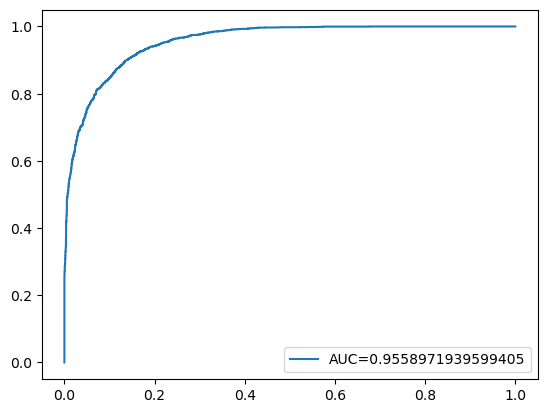

In [16]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

<hr>

### Support Vector Machines
<a class = 'anchor' id = svm></a>
[Back to Table of Contents](#toc)

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [18]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# a = GridSearchCV(estimator=SVC(random_state =42),
#                  param_grid={"kernel" : ["linear", 'rbf'],
#                              "gamma" : ["auto"],
#                              "C" : [0.01,0.1]},
#                 verbose = 0)
# a.fit(X_train,y_train)

# print('Best kernel:', a.best_estimator_.get_params()['kernel'])
# print('Best gamma:', a.best_estimator_.get_params()['gamma'])
# print('Best C:', a.best_estimator_.get_params()['C'])

In [19]:
svm = SVC(kernel = "linear", gamma = "auto", C = 0.01, probability=True, random_state=42)
start_time = time.time()
svm.fit(X_train,y_train)
svm_end_time = time.time() - start_time
#use model to make predictions on test data
y_pred = svm.predict(X_test)

cm2 = metrics.confusion_matrix(y_test, y_pred)
print(cm2)
print("model run time:",svm_end_time)

C:\Users\Joey\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[3096  366]
 [ 380 2287]]
model run time: 27.26952862739563


In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8782835699135259


### Classification Report

In [21]:
svm_report = classification_report(y_test, y_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



### AUC 

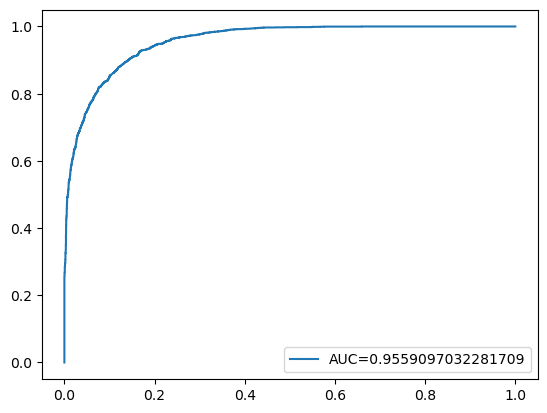

In [22]:
#define metrics
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## Model Evaluation
<a class = 'anchor' id = eval></a>
[Back to Table of Contents](#toc)

### Logistic Regression

**Advantages of Logistic Regression:**

**Simplicity and interpretability:** Logistic Regression is a relatively simple model that is easy to implement and interpret. It provides the probability of belonging to a particular class based on the input features.<br><br>
**Efficiency:** Logistic Regression is computationally efficient, especially for large datasets with many features. It converges relatively quickly during training.<br><br>
**Handles linear relationships well:** If the relationship between the features and the target variable is linear, Logistic Regression can provide accurate predictions.

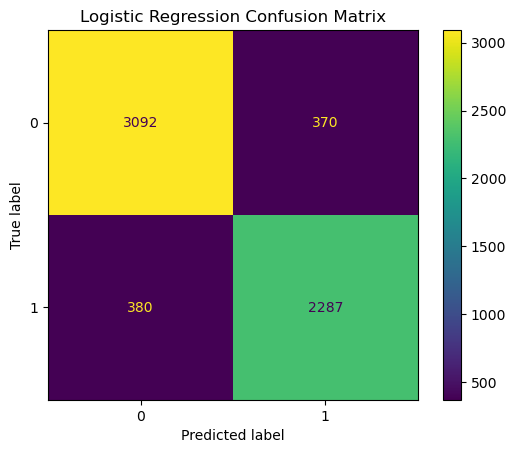

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=log_regression.classes_)
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [24]:
print(logistic_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



### SVM

**Advantages of SVM:**

**Non-linearity:** SVM can handle both linear and non-linear classification problems. It achieves this by using different kernel functions (e.g., linear, polynomial, radial basis function) to transform the input data into a higher-dimensional feature space where it can find a hyperplane to separate the classes.<br><br>
    
**Margin maximization:** SVM aims to find a decision boundary that maximizes the margin (distance) between the two classes. This can lead to better generalization and improved performance on unseen data.<br><br>
    
**Robustness to outliers:** SVM is less sensitive to outliers since it focuses on finding the optimal decision boundary that maximizes the margin and ignores instances that lie far away from the boundary.

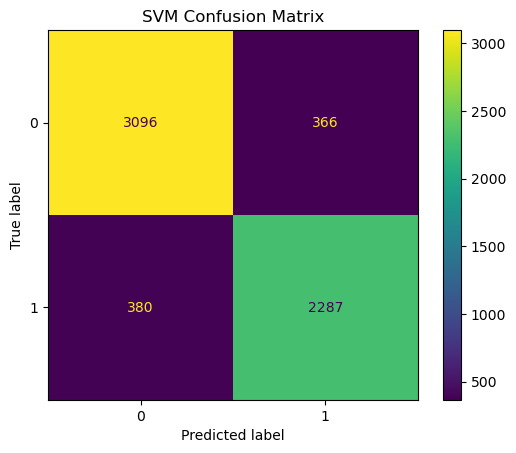

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=log_regression.classes_)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

In [26]:
print(svm_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



## Comparison

*Finally, we will compare the performance of the SVM and Logistic Regression models based on the provided results:*

**Accuracy:** Both models achieved the same accuracy of 88%, indicating that they performed equally well in terms of predicting the correct class labels.

**Training Time:** The SVM model took significantly longer to train compared to the Logistic Regression model. The SVM model's training time was 26.4 seconds, while the Logistic Regression model took only 0.015 seconds. This suggests that Logistic Regression is more efficient in terms of training time.

**AUC:** Both models achieved the same AUC (Area Under the Curve) value of 0.955. AUC is a measure of the model's ability to discriminate between the positive and negative classes. Since both models have the same AUC, they have comparable discriminatory power.

**Precision, Recall, and F1-Score:** The precision, recall, and F1-scores for both models are identical, indicating that they have similar performance in terms of correctly classifying the positive and negative classes.

Based on the provided results, it can be concluded that both SVM and Logistic Regression models offer similar performance in terms of prediction accuracy, precision, recall, and F1-score. However, Logistic Regression outperforms SVM in terms of training time efficiency. If training time is a critical factor, Logistic Regression would be a more suitable choice. On the other hand, if non-linearity and robustness to outliers are important considerations, SVM may be preferred.

## Logistic Regression Weights & Interpretation
<a class = 'anchor' id = interp></a>
[Back to Table of Contents](#toc)

To interpret the importance of different features in logistic regression, we look at the coefficients associated with each feature. The coefficients indicate the direction and magnitude of the relationship between the feature and the log-odds of the classification task. In this case, we have the following coefficients for each feature:

**Feature:** WritingScore<br>
**Coefficient:** 3.15

The large positive coefficient for "WritingScore" indicates that a higher writing score has a significant positive impact on the log-odds of the classification task. It suggests that individuals with better writing skills are much more likely to succeed in the task compared to those with lower writing scores.


**Feature:** Gender_male<br>
**Coefficient:** 1.95

The positive coefficient for "Gender_male" indicates that being male is associated with a higher log-odds of the classification task. This suggests that, in this particular task, males may have a higher likelihood of success compared to females.

**Feature:** ReadingScore<br>
**Coefficient:** 1.18

A large positive coefficient for "ReadingScore" suggests that a higher reading score is strongly associated with a higher log-odds of the classification task. This indicates that individuals with better reading scores have a significantly higher likelihood of success in the task compared to those with lower scores.

**Feature:** LunchType_standard<br>
**Coefficient:** 0.52

The positive coefficient for "LunchType_standard" suggests that having a standard lunch is associated with a higher log-odds of the classification task. It implies that students who have a standard lunch may have a slightly higher likelihood of success compared to those who have a free/reduced lunch.

**Feature:** TestPrep_none<br>
**Coefficient:** 0.51

The positive coefficient for "TestPrep_none" indicates that not having any test preparation is associated with a higher log-odds of the classification task. This suggests that individuals who did not prepare for the test have a higher likelihood of success compared to those who did prepare.

**Feature:** WklyStudyHours<br>
**Coefficient:** 0.16

Similar to the previous features, a positive coefficient for "WklyStudyHours" indicates that an increase in weekly study hours is associated with a higher log-odds of the classification task. It suggests that dedicating more time to studying may contribute to a higher likelihood of success in the task.

**Feature:** PracticeSport<br>
**Coefficient:** 0.1325

The positive coefficient suggests that an increase in the "PracticeSport" feature is associated with a higher log-odds of the classification task. It indicates that participating in sports may have a positive impact on the likelihood of the task.

**Feature:** TransportMeans_school_bus<br>
**Coefficient:** 0.013

The positive coefficient for "TransportMeans_school_bus" suggests that using a school bus as a means of transport is associated with a slightly higher log-odds of the classification task. However, the magnitude of this coefficient is quite small, indicating that the choice of transportation means may not have a significant impact on the likelihood of success in the task.

**Feature:** IsFirstChild_yes<br>
**Coefficient:** 0.00032

The small positive coefficient for "IsFirstChild_yes" suggests that being a first child has a minimal positive impact on the log-odds of the classification task. However, the magnitude of this coefficient is quite small, indicating that being a first child may not be a significant factor in determining the likelihood of success in the task.

The reasons why certain variables are more important can vary. For Example, "WritingScore" suggests that individuals with higher writing scores are more likely to be classified as having a passing math score, but it does not necessarily imply that writing skills determine math performance. Alternatively it indicates that there may be some correlation or indirect relationship between writing skills and the likelihood of passing the math test within the given environment of the sampled data. 

In general, the coefficients associated with each feature indicate the direction and magnitude of the relationship between the feature and the log-odds of the classification task. Positive coefficients suggest that an increase in the feature is associated with a higher log-odds, indicating a higher likelihood of the outcome occuring. However, the magnitude of the coefficient also matters. Larger coefficients imply a stronger impact on the log-odds, while smaller coefficients suggest a weaker impact. However, it is essential to interpret these coefficients within the specific context of the data and task at hand.

In [27]:
feature_names = X_train2.columns.tolist()
coefficients = log_regression.coef_

for i, feature_name in enumerate(feature_names):
    coefficient = coefficients[0][i]
    print(f"Feature: {feature_name} >>> Coefficient: {coefficient} \n")

Feature: PracticeSport >>> Coefficient: 0.13250569345841776 

Feature: WklyStudyHours >>> Coefficient: 0.15541370197076296 

Feature: ReadingScore >>> Coefficient: 1.1812071586934951 

Feature: WritingScore >>> Coefficient: 3.150504004223275 

Feature: Gender_male >>> Coefficient: 1.9503675598580805 

Feature: LunchType_standard >>> Coefficient: 0.5210925977403912 

Feature: TestPrep_none >>> Coefficient: 0.507195017368703 

Feature: IsFirstChild_yes >>> Coefficient: 0.00032719332168762113 

Feature: TransportMeans_school_bus >>> Coefficient: 0.013131300505185147 



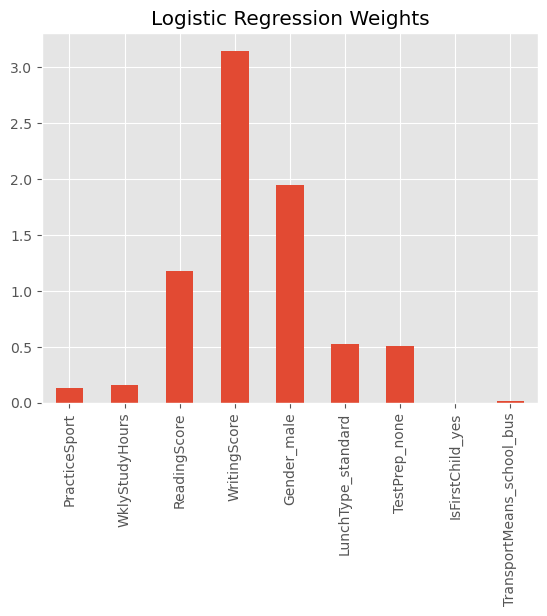

In [28]:
plt.style.use('ggplot')
coefficients = pd.Series(log_regression.coef_[0],index=feature_names)
coefficients.plot(kind='bar')
plt.title('Logistic Regression Weights')
plt.show()

## Support Vector Inspection
<a class = 'anchor' id = support></a>
[Back to Table of Contents](#toc)

In [29]:
#amdended code
support_vectors = svm.support_vectors_
print(support_vectors)

[[ 0.38763139 -0.45413638  0.04101419 ...  0.69425001  0.72859581
  -1.30687025]
 [ 0.38763139 -0.45413638  0.98874543 ...  0.69425001  0.72859581
  -1.30687025]
 [ 0.38763139 -0.45413638  0.5825749  ...  0.69425001  0.72859581
   0.7651869 ]
 ...
 [ 0.38763139 -0.45413638  0.24409945 ... -1.4404033   0.72859581
  -1.30687025]
 [-2.57977043 -0.45413638  0.5825749  ...  0.69425001 -1.37250308
   0.7651869 ]
 [ 0.38763139 -0.45413638 -0.36515635 ...  0.69425001  0.72859581
   0.7651869 ]]


In [30]:
#amdended code
support_vector_labels = svm.predict(support_vectors)

In [31]:
#amdended code
predicted_labs = svm.predict(support_vectors)

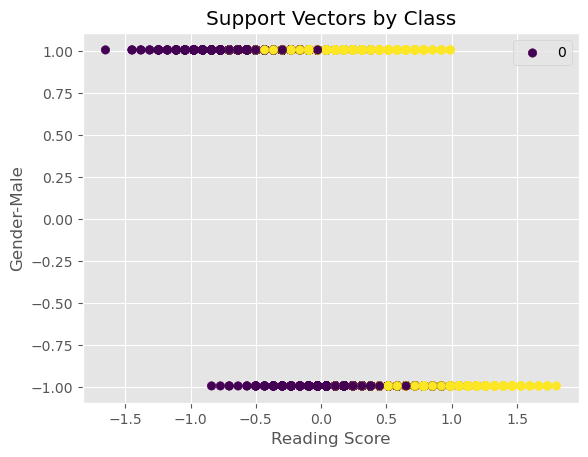

In [32]:
#amdended code
plt.scatter(support_vectors[:, 2], support_vectors[:,4], c=support_vector_labels)
plt.xlabel('Reading Score')
plt.ylabel('Gender-Male')
plt.title('Support Vectors by Class')
plt.legend(support_vector_labels)
plt.show()

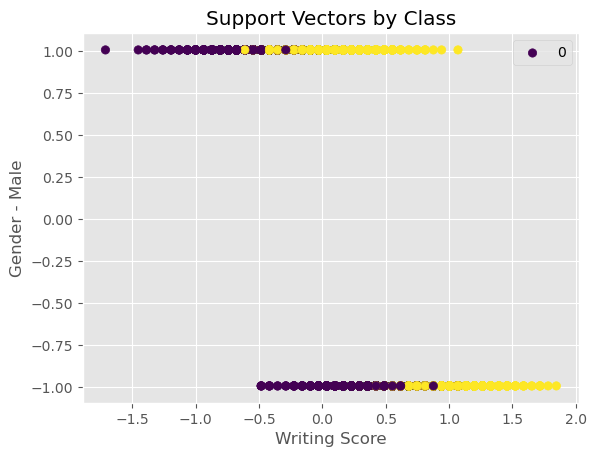

In [33]:
#amdended code
plt.scatter(support_vectors[:, 3], support_vectors[:,4], c=support_vector_labels)
plt.xlabel('Writing Score')
plt.ylabel('Gender - Male')
plt.title('Support Vectors by Class')
plt.legend(support_vector_labels)
plt.show()

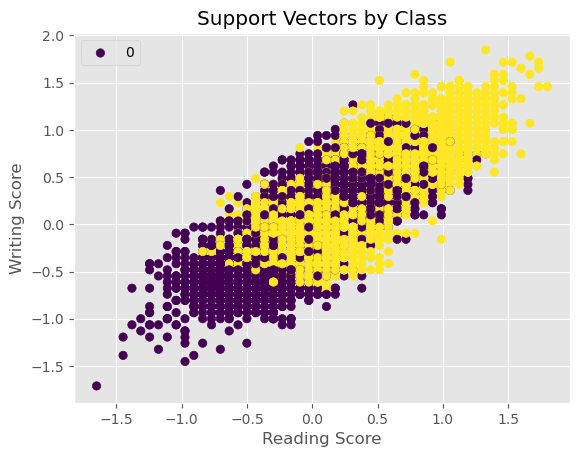

In [34]:
#amdended code
plt.scatter(support_vectors[:, 2], support_vectors[:,3], c=support_vector_labels)
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Support Vectors by Class')
plt.legend(support_vector_labels)
plt.show()

### Support Vector Scatter Plot

By examining the scatter plot of support vectors, we can gain insights into the separation of classes, the decision boundary, the presence of outliers, the margin width, and the overall performance of the SVM model. This visualization can help us understand the behavior and characteristics of the SVM model and identify potential areas for improvement or further investigation.

In this report our support vector scatter plot will not specifically show decision boundaries explicity outlined. Nevertheless, The following insights can still be had from our scatterplots:

   - The scatter plot can visually demonstrate how well the classes are separated by the SVM model. Support vectors from different classes should form distinct clusters or groups in the plot. <br><br>
   - Support vectors that are located near the decision boundary or deviate from the main clusters can indicate potential outliers or challenging data points. By examining their positions in the scatter plot, we can identify any anomalies or misclassified instances that may require further investigation.<br><br>
   - The scatter plot can serve as a visual check to evaluate the performance of the SVM model. If the support vectors are well-separated into distinct clusters and lie predominantly on the correct side of the decision boundary, it indicates good model performance.

### Support Vector Inights

The chosen support vectors for the classification task provide valuable insights into the data. By plotting a scatter plot of the support vectors, distinct visual grouping is observed for 'reading score,' 'writing score,' and 'gender.' This suggests that these features play a significant role in the classification task and have a strong influence on the decision boundary. The visual grouping indicates that these features contribute to the separation of classes and help discriminate between different categories within the dataset. Therefore, analyzing the support vectors for these features can provide meaningful insights into the underlying patterns and characteristics of the data.

### Support Vector Cont..

This section examines the support vectors. The evaluation in this section is conducted using a an approach in viewing the plots of the instances of the Support Vectors and their original. We will be using our original dataset to allow us to observe the support vectors through the SVC function.

Out of 24513 training points, only 7528 observations were used, where it was split between 1807 and 1789 results of testing. 

Based on the analysis of our SVM model for predicting pass or fail, we have identified two key support vectors that significantly contribute to the model's decision-making process. The graphs above clearly illustrate that the larger support vectors are predominantly associated with the Writing Score and Gender variables. This observation aligns with our previous exploratory data analysis, where we identified Gender as an important feature in our model.

By closely examining the support vectors, we can gain valuable insights into the underlying patterns and dynamics that influence the classification outcomes. Specifically, the prominent influence of Writing Score and Gender on the support vectors suggests that these variables play a crucial role in determining the pass or fail status.

In [35]:
#Data Dimensions for our training data for our SVM model
#Support Vectors
print(svm.support_vectors_.shape)
print(svm.support_.shape)
print(svm.n_support_ )


(7528, 9)
(7528,)
[3763 3765]


Support vectors represent data points that are closest to the decision boundary or hyperplane. These points contain a the most influence on the construction of the decision boundary. Analyzing the characteristics of the support vectors allows us to identify specific data points that significantly contribute to the classification task. 

### Conclusion 

In conclusion, this mini-lab provides valuable insights into understanding and analyzing data in the context of Support Vector Machines (SVM) and Logistic Regression. By creating count plots of the response variable, we gain insights into class imbalance, data understanding, decision boundary assessment, and appropriate performance evaluation metrics.

Additionally, we highlight the benefits of transforming binary categorical variables into dummy variables before applying SVM and Logistic Regression. This transformation ensures numerical representation, avoids ordinal assumptions, and handles non-linearity in the relationships between variables.

Regarding the performance comparison between SVM and Logistic Regression, both models achieved similar accuracy, precision, recall, and F1-scores. However, Logistic Regression outperformed SVM in terms of training time efficiency. The AUC values were also comparable, indicating similar discriminatory power.

Next, we analyzed the logistic regression weights to interpret the importance of different features. The coefficients associated with each feature provided insights into their impact on the log-odds of the classification task. We observed that variables such as WritingScore, Gender_male, and ReadingScore had significant positive coefficients, indicating their influence on the likelihood of success in the task.
It is crucial to consider the specific context of the data and the task at hand when interpreting these coefficients. The magnitude of the coefficients is also relevant, with larger coefficients suggesting a stronger impact on the log-odds.

Finally, we visualized the support vectors, and determined their significance in helping to identify class separation and further our understanding of how they aid in the classification process of SVM.

In summary, this mini-lab contributes to a better understanding of data analysis techniques for SVM and Logistic Regression, highlights the advantages of each model, provides insights into the importance of different features in logistic regression, and support vector machines.